In [10]:
import scikitplot as sckplt
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 
from sklearn import linear_model
import matplotlib.pyplot as plt
import xgboost as xgb
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.utils import shuffle
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
# import necessary libraries and specify that graphs should be plotted inline. 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import neighbors, datasets,naive_bayes
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
import scikitplot as skplt


In [2]:

data=pd.read_csv('spambase.data',header=None)

#split dataset in features and target variable
X = data.iloc[:,:56]# Features
y = data.iloc[:,57] # Target variable

#Test_train_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 42)


In [3]:

#extracting important features using random forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X_train, y_train)

importance = clf.feature_importances_ 

num = np.arange(0,56,1)
features = importance> 0.005 # setting a cut off 0.005 
important_features = num[features]


#subsetting based on important features
X1_train = X_train[list(important_features)]
X1_test = X_test[list(important_features)]

In [4]:
# using logistic regression to decide if feature selected models perform better than entire dataset

Logistic_model = linear_model.LogisticRegression()
Logistic_model.fit(X_train,y_train)
predicted = Logistic_model.predict(X_test)

print("Prediction Accuracy is ",accuracy_score(y_test, predicted)) #using accuracy to evaluate model performance 
# Prediction Accuracy is  0.9268645908761767

# fitting it on feature selected dataset 
Logistic_model.fit(X1_train,y_train)

#final best fit model fit on the entire dataset Logistic_model.fit(X_train,y_train)
predicted = Logistic_model.predict(X1_test)

print("Prediction Accuracy is ",accuracy_score(y_test, predicted)) #using accuracy to evaluate model performance 
# Prediction Accuracy is  0.8986241853729182

# prediction accuracy decreases when we do feature selection as the model 
# now has lesser number of datapoints to learn from 
# on the other hand more features increases the complexity of the model 



Prediction Accuracy is  0.9312092686459088
Prediction Accuracy is  0.8979000724112962


C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
## Normalising the dataset 

#Pre-processing the data and scaling data 
scaled_dataset = MinMaxScaler(feature_range=(0, 1)) #using Min-Max scaler

# for training dataset
x_train_scaled = scaled_dataset.fit_transform(X_train)
xn_train = pd.DataFrame(x_train_scaled)

# repeating for the test dataset 
x_test_scaled = scaled_dataset.fit_transform(X_test)
xn_test = pd.DataFrame(x_test_scaled)

Logistic_model = linear_model.LogisticRegression()
Logistic_model.fit(X_train,y_train)
predicted = Logistic_model.predict(X_test)

print("Prediction Accuracy is ",accuracy_score(y_test, predicted)) #using accuracy to evaluate model performance 
# Prediction Accuracy is  0.9312092686459088

# fitting it on feature selected dataset 
Logistic_model.fit(xn_train,y_train)

#final best fit model fit on the entire dataset Logistic_model.fit(X_train,y_train)
predicted = Logistic_model.predict(xn_test)

print("Prediction Accuracy is ",accuracy_score(y_test, predicted)) #using accuracy to evaluate model performance 
# Prediction Accuracy is  0.9073135409123824


# Using the same for knn classifier 
model = neighbors.KNeighborsClassifier()
model.fit(X_train,y_train)
predicted = model.predict(X_test)

print("Prediction Accuracy is ",accuracy_score(y_test, predicted)) #using accuracy to evaluate model performance 
# Prediction Accuracy is  0.8863142650253439

model.fit(xn_train,y_train)
predicted = model.predict(xn_test)

print("Prediction Accuracy is ",accuracy_score(y_test, predicted)) #using accuracy to evaluate model performance 
# Prediction Accuracy is  0.8928312816799421

# Data which is not normalised performs better on logistic regression. This goes to say that
# for models which dont have distance based calculation non normalised data makes much more sense
# for other models which uses distance based datasets like knn normalised dataset gives better results 


C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Prediction Accuracy is  0.9312092686459088
Prediction Accuracy is  0.9073135409123824
Prediction Accuracy is  0.8863142650253439
Prediction Accuracy is  0.8928312816799421


In [7]:
# writing the custom score function that minimises the False positive rates 
from sklearn.metrics import fbeta_score, make_scorer

def my_custom_loss_func(y_true, y_pred):
   diff = (y_true - y_pred).sum() * 10
   diff2 = (y_pred - y_true).sum() * 1
   return diff + diff2

score_function = make_scorer(my_custom_loss_func, greater_is_better=True)

from sklearn.svm import LinearSVC

# USING THIS COST MATRIX
cost_mat  = [[0,10],[1,0]]


In [11]:
############################## Logistic Regression ###################################################
# part 1 

# Hypertuning the model using cross validation
penalty = ['l1','l2']
c= np.arange (0.5, 10.5, 0.5)

param_grid = dict(penalty = penalty,C=c)
print(param_grid)
Logistic_model = linear_model.LogisticRegression()

grid = GridSearchCV(Logistic_model, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_train,y_train)
#final best fit model fit on the entire dataset 
logic_clf = grid.best_estimator_
logic_clf.fit(X_train,y_train)
#Prediction using the fitted model
predicted = logic_clf.predict(X_test)
# Accuracy, classification report and confusion matrix of the fitted model
print("Prediction Accuracy is ",accuracy_score(y_test, predicted))
print("Classification report is ",classification_report(y_test, predicted))
print("Confusion matrix is ",confusion_matrix(y_test, predicted))

cm_dtc = confusion_matrix(y_test, predicted)
print (" Misclassification Cost : \n",  \
       (cm_dtc*cost_mat).sum())


{'penalty': ['l1', 'l2'], 'C': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])}
Prediction Accuracy is  0.9268645908761767
Classification report is                precision    recall  f1-score   support

           0       0.92      0.96      0.94       804
           1       0.94      0.89      0.91       577

   micro avg       0.93      0.93      0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381

Confusion matrix is  [[769  35]
 [ 66 511]]
 Misclassification Cost : 
 416


AUC:  0.9738396406183984


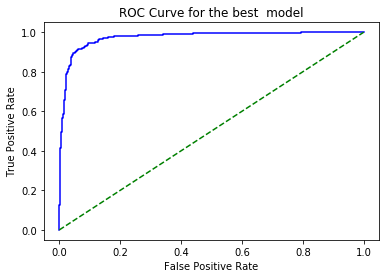

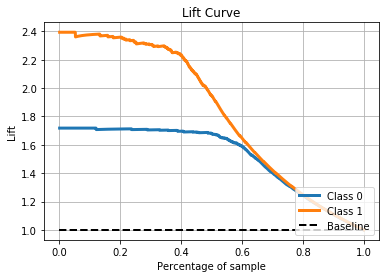

In [12]:
pred_scores = logic_clf.fit(X_train,y_train).predict_proba(X_test)

fpr, tpr, thresh = roc_curve(y_test, pred_scores[:,1])

auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, 'blue')
plt.plot([0,1], [0,1], 'g--')
print ("AUC: ", auc_score)
#print ("FPR : ", fpr, " :: TPR : ", tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for the best  model")
plt.show()
sckplt.metrics.plot_lift_curve(y_test, pred_scores)
plt.show()


In [13]:
# PART 2 

penalty = ['l1','l2']
c= np.arange (0.5, 10.5, 0.5)

param_grid = dict(penalty = penalty,C=c)
print(param_grid)
Logistic_model = linear_model.LogisticRegression()

grid = GridSearchCV(Logistic_model, param_grid, cv = 10, scoring = score_function )
grid.fit(X_train,y_train)

#final best fit model fit on the entire dataset 
logic_clf = grid.best_estimator_
logic_clf.fit(X_train,y_train)
#Prediction using the fitted model
predicted = logic_clf.predict(X_test)
# Accuracy, classification report and confusion matrix of the fitted model
print("Prediction Accuracy is ",accuracy_score(y_test, predicted))
print("Classification report is ",classification_report(y_test, predicted))
print("Confusion matrix is ",confusion_matrix(y_test, predicted))


{'penalty': ['l1', 'l2'], 'C': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])}
Prediction Accuracy is  0.9246922519913107
Classification report is                precision    recall  f1-score   support

           0       0.92      0.96      0.94       804
           1       0.94      0.88      0.91       577

   micro avg       0.92      0.92      0.92      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.92      0.92      1381

Confusion matrix is  [[771  33]
 [ 71 506]]


 Misclassification Cost : 
 401
AUC:  0.9744582977659364


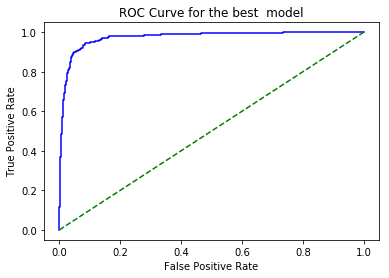

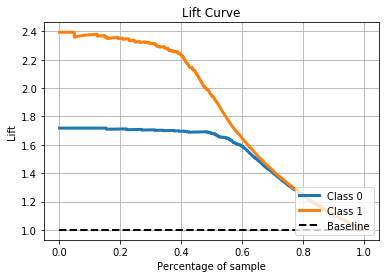

In [14]:

cm_dtc = confusion_matrix(y_test, predicted)
print (" Misclassification Cost : \n",  \
       (cm_dtc*cost_mat).sum())


pred_scores = logic_clf.fit(X_train,y_train).predict_proba(X_test)

fpr, tpr, thresh = roc_curve(y_test, pred_scores[:,1])

auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, 'blue')
plt.plot([0,1], [0,1], 'g--')
print ("AUC: ", auc_score)
#print ("FPR : ", fpr, " :: TPR : ", tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for the best  model")
plt.show()
sckplt.metrics.plot_lift_curve(y_test, pred_scores)
plt.show()


In [15]:
#################################################### Decision Tree ########################################################
# PART A 


# Optimize decision tree simultaneously trying to detect over-fitting 
depth_range = list(range(2,25))
method = ["gini", "entropy"]
param_grid = dict(max_depth = depth_range, criterion = method)
print (param_grid)
tree_clf = tree.DecisionTreeClassifier()

grid = GridSearchCV(tree_clf, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_train,y_train)
#checking for 10 fold cross validation

print ('The Best score is ', grid.best_score_)
print ('The Best parameter is ', grid.best_params_)
print ('The best estimator is ', grid.best_estimator_)
print("Prediction Accuracy is ",accuracy_score(y_test, grid.predict(X_test)))
#Best fit model
best_tree_clf = grid.best_estimator_
best_tree_clf.fit(X_train,y_train)

predicted_model = best_tree_clf.predict(X_test)

print("Prediction Accuracy is ",accuracy_score(y_test, predicted_model))
print("Classification report is ",classification_report(y_test, predicted_model))
print("Confusion matrix is",confusion_matrix(y_test, predicted_model))


{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'criterion': ['gini', 'entropy']}
The Best score is  0.9217391304347826
The Best parameter is  {'criterion': 'gini', 'max_depth': 8}
The best estimator is  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Prediction Accuracy is  0.9123823316437364
Prediction Accuracy is  0.9102099927588704
Classification report is                precision    recall  f1-score   support

           0       0.90      0.95      0.92       804
           1       0.92      0.86      0.89       577

   micro avg       0.91      0.91      0.91      1381
   macro avg       0.91      0.90      0.91      1381
weighted avg 

 Misclassification Cost : 
 502
AUC:  0.9333122084551246


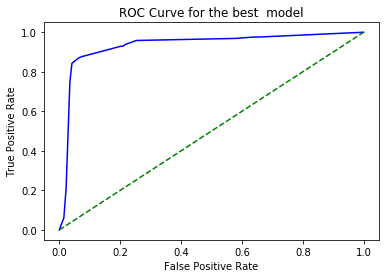

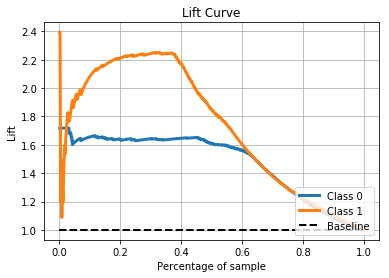

In [17]:
cm_dtc = confusion_matrix(y_test, predicted_model)
print (" Misclassification Cost : \n",  \
       (cm_dtc*cost_mat).sum())


pred_scores = best_tree_clf.fit(X_train,y_train).predict_proba(X_test)

fpr, tpr, thresh = roc_curve(y_test, pred_scores[:,1])

auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, 'blue')
plt.plot([0,1], [0,1], 'g--')
print ("AUC: ", auc_score)
#print ("FPR : ", fpr, " :: TPR : ", tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for the best  model")
plt.show()
sckplt.metrics.plot_lift_curve(y_test, pred_scores)
plt.show()

In [18]:
# PART B

# Optimize decision tree simultaneously trying to detect over-fitting 
depth_range = list(range(2,25))
method = ["gini", "entropy"]
param_grid = dict(max_depth = depth_range, criterion = method)
print (param_grid)
tree_clf = tree.DecisionTreeClassifier()

grid = GridSearchCV(tree_clf, param_grid, cv = 10, scoring = score_function)
grid.fit(X_train,y_train)
#checking for 10 fold cross validation

print ('The Best score is ', grid.best_score_)
print ('The Best parameter is ', grid.best_params_)
print ('The best estimator is ', grid.best_estimator_)
print("Prediction Accuracy is ",accuracy_score(y_test, grid.predict(X_test)))
#Best fit model
best_tree_clf = grid.best_estimator_
best_tree_clf.fit(X_train,y_train)

predicted_model = best_tree_clf.predict(X_test)

print("Prediction Accuracy is ",accuracy_score(y_test, predicted_model))
print("Classification report is ",classification_report(y_test, predicted_model))
print("Confusion matrix is",confusion_matrix(y_test, predicted_model))

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'criterion': ['gini', 'entropy']}
The Best score is  250.2
The Best parameter is  {'criterion': 'entropy', 'max_depth': 2}
The best estimator is  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Prediction Accuracy is  0.8544532947139754
Prediction Accuracy is  0.8544532947139754
Classification report is                precision    recall  f1-score   support

           0       0.82      0.96      0.89       804
           1       0.93      0.70      0.80       577

   micro avg       0.85      0.85      0.85      1381
   macro avg       0.88      0.83      0.84      1381
weighted avg       0

 Misclassification Cost : 
 462
AUC:  0.8385240176931632


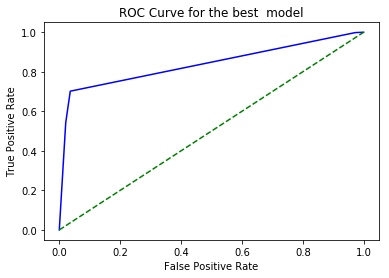

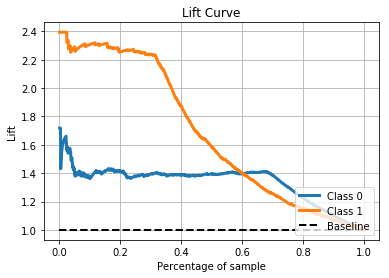

In [19]:
cm_dtc = confusion_matrix(y_test, predicted_model)
print (" Misclassification Cost : \n",  \
       (cm_dtc*cost_mat).sum())


pred_scores = best_tree_clf.fit(X_train,y_train).predict_proba(X_test)

fpr, tpr, thresh = roc_curve(y_test, pred_scores[:,1])

auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, 'blue')
plt.plot([0,1], [0,1], 'g--')
print ("AUC: ", auc_score)
#print ("FPR : ", fpr, " :: TPR : ", tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for the best  model")
plt.show()
sckplt.metrics.plot_lift_curve(y_test, pred_scores)
plt.show()

In [26]:
#################################################### KNN Classifier ########################################################
# PART 1 

# Optimize the KNN model by hypertuning using cross validation
# Different parameters for tuning the model
neighbours_range = list(range(2,10))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors=neighbours_range, weights= weight_options)
print(param_grid)

# the model itself 
model = neighbors.KNeighborsClassifier()

grid = GridSearchCV(model, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(xn_train,y_train) #using the normalised dataset

# Displaying the best fit classifier
print ('The Best score is ', grid.best_score_)
print ('The Best parameter is ', grid.best_params_)
print ('The best estimator is ', grid.best_estimator_)
# Best fit model
knn_clf = grid.best_estimator_
knn_clf.fit(xn_train,y_train)
predicted = knn_clf.predict(xn_test)

# Final accuracy, classification report and confusion matrix of the fitted model
print("Prediction Accuracy: ",accuracy_score(y_test, predicted))
print("Classification_report",classification_report(y_test, predicted))
print("Confusion_matrix",confusion_matrix(y_test, predicted))

{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9], 'weights': ['uniform', 'distance']}
The Best score is  0.9124223602484473
The Best parameter is  {'n_neighbors': 5, 'weights': 'distance'}
The best estimator is  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')
Prediction Accuracy:  0.8928312816799421
Classification_report               precision    recall  f1-score   support

           0       0.90      0.91      0.91       804
           1       0.88      0.87      0.87       577

   micro avg       0.89      0.89      0.89      1381
   macro avg       0.89      0.89      0.89      1381
weighted avg       0.89      0.89      0.89      1381

Confusion_matrix [[733  71]
 [ 77 500]]


 Misclassification Cost : 
 787
AUC:  0.9504168930046473


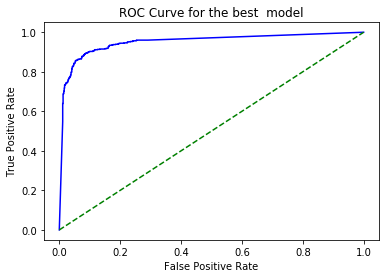

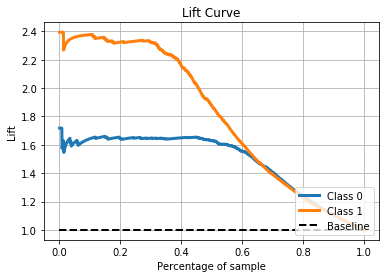

In [27]:
cm_dtc = confusion_matrix(y_test, predicted)
print (" Misclassification Cost : \n",  \
       (cm_dtc*cost_mat).sum())

pred_scores = knn_clf.fit(X_train,y_train).predict_proba(X_test)

fpr, tpr, thresh = roc_curve(y_test, pred_scores[:,1])

auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, 'blue')
plt.plot([0,1], [0,1], 'g--')
print ("AUC: ", auc_score)
#print ("FPR : ", fpr, " :: TPR : ", tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for the best  model")
plt.show()
sckplt.metrics.plot_lift_curve(y_test, pred_scores)
plt.show()

In [22]:
# PART 2

# Optimize the KNN model by hypertuning using cross validation
# Different parameters for tuning the model
neighbours_range = list(range(2,10))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors=neighbours_range, weights= weight_options)
print(param_grid)

# the model itself 
model = neighbors.KNeighborsClassifier()

grid = GridSearchCV(model, param_grid, cv = 10, scoring = score_function)
grid.fit(xn_train,y_train) #using the normalised dataset

# Displaying the best fit classifier
print ('The Best score is ', grid.best_score_)
print ('The Best parameter is ', grid.best_params_)
print ('The best estimator is ', grid.best_estimator_)
# Best fit model
knn_clf = grid.best_estimator_
knn_clf.fit(xn_train,y_train)
predicted = knn_clf.predict(xn_test)

# Final accuracy, classification report and confusion matrix of the fitted model
print("Prediction Accuracy: ",accuracy_score(y_test, predicted))
print("Classification_report",classification_report(y_test, predicted))
print("Confusion_matrix",confusion_matrix(y_test, predicted))

{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9], 'weights': ['uniform', 'distance']}
The Best score is  174.56645962732918
The Best parameter is  {'n_neighbors': 2, 'weights': 'uniform'}
The best estimator is  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')
Prediction Accuracy:  0.8689355539464156
Classification_report               precision    recall  f1-score   support

           0       0.84      0.95      0.89       804
           1       0.92      0.76      0.83       577

   micro avg       0.87      0.87      0.87      1381
   macro avg       0.88      0.85      0.86      1381
weighted avg       0.87      0.87      0.87      1381

Confusion_matrix [[764  40]
 [141 436]]


 Misclassification Cost : 
 541
AUC:  0.9234848288884866


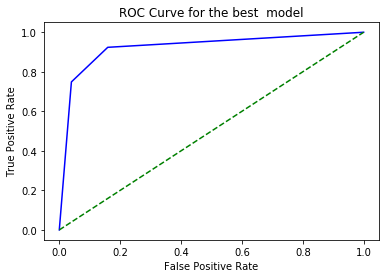

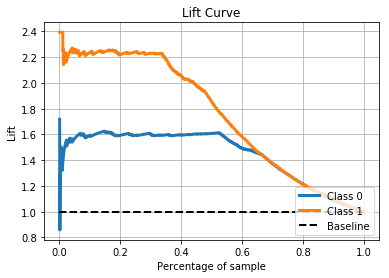

In [25]:
cm_dtc = confusion_matrix(y_test, predicted)
print (" Misclassification Cost : \n",  \
       (cm_dtc*cost_mat).sum())

pred_scores = knn_clf.fit(X_train,y_train).predict_proba(X_test)

fpr, tpr, thresh = roc_curve(y_test, pred_scores[:,1])

auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, 'blue')
plt.plot([0,1], [0,1], 'g--')
print ("AUC: ", auc_score)
#print ("FPR : ", fpr, " :: TPR : ", tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for the best  model")
plt.show()
sckplt.metrics.plot_lift_curve(y_test, pred_scores)
plt.show()

In [28]:
#################################################### SVM Classifier ########################################################

# Part 1 

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='accuracy')
    clf.fit(xn_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(xn_test)
    print(classification_report(y_true, y_pred))
    print()

print ('The Best score is ', clf.best_score_)
print ('The Best parameter is ', clf.best_params_)
print ('The best estimator is ', clf.best_estimator_)
print("Prediction Accuracy is ",accuracy_score(y_test, clf.predict(X_test)))
predicted_model = clf.predict(X_test)
print("Classification report is ",classification_report(y_test, predicted_model))
print("Confusion matrix is",confusion_matrix(y_test, predicted_model))

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 1000, 'kernel': 'linear'}

Grid scores on development set:

0.630 (+/-0.007) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.616 (+/-0.001) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.856 (+/-0.021) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.630 (+/-0.007) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.897 (+/-0.020) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.856 (+/-0.021) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.889 (+/-0.019) for {'C': 1, 'kernel': 'linear'}
0.908 (+/-0.021) for {'C': 10, 'kernel': 'linear'}
0.926 (+/-0.016) for {'C': 100, 'kernel': 'linear'}
0.928 (+/-0.018) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       804
  

 Misclassification Cost : 
 7290
AUC:  0.9651568845546962


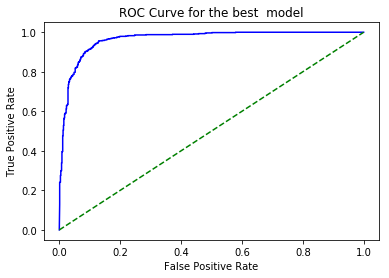

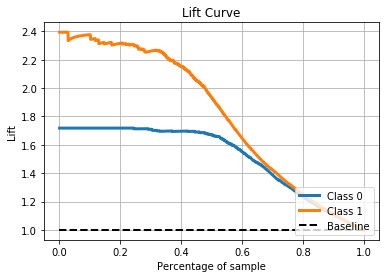

In [30]:
cm_dtc = confusion_matrix(y_test, predicted_model)
print (" Misclassification Cost : \n",  \
       (cm_dtc*cost_mat).sum())

model = svm.SVC(probability=True,kernel = 'linear',C = 1000)

pred_scores = model.fit(xn_train, y_train).predict_proba(xn_test)

fpr, tpr, thresh = roc_curve(y_test, pred_scores[:,1])

auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, 'blue')
plt.plot([0,1], [0,1], 'g--')
print ("AUC: ", auc_score)
#print ("FPR : ", fpr, " :: TPR : ", tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for the best  model")
plt.show()
sckplt.metrics.plot_lift_curve(y_test, pred_scores)
plt.show()


In [31]:
# Part 2

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['score_function']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring=score_function)
    clf.fit(xn_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(xn_test)
    print(classification_report(y_true, y_pred))
    print()

print ('The Best score is ', clf.best_score_)
print ('The Best parameter is ', clf.best_params_)
print ('The best estimator is ', clf.best_estimator_)
print("Prediction Accuracy is ",accuracy_score(y_test, clf.predict(X_test)))
predicted_model = clf.predict(X_test)
print("Classification report is ",classification_report(y_test, predicted_model))
print("Confusion matrix is",confusion_matrix(y_test, predicted_model))

# Tuning hyper-parameters for score_function

Best parameters set found on development set:

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Grid scores on development set:

2093.428 (+/-65.021) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
2224.803 (+/-7.204) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
466.189 (+/-127.993) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
2093.428 (+/-65.021) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
246.617 (+/-57.617) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
466.189 (+/-127.993) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
309.614 (+/-107.157) for {'C': 1, 'kernel': 'linear'}
163.783 (+/-74.138) for {'C': 10, 'kernel': 'linear'}
70.175 (+/-71.424) for {'C': 100, 'kernel': 'linear'}
52.169 (+/-112.316) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

    

 Misclassification Cost : 
 892
AUC:  0.9651762849530512


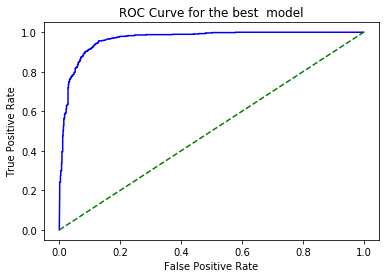

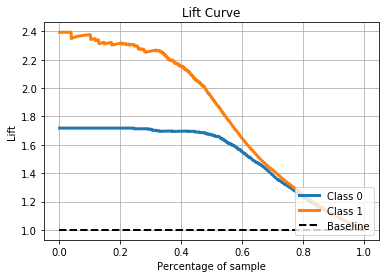

In [32]:
cm_dtc = confusion_matrix(y_test, predicted_model)
print (" Misclassification Cost : \n",  \
       (cm_dtc*cost_mat).sum())

model = svm.SVC(probability=True,kernel = 'linear',C = 1000)

pred_scores = model.fit(xn_train, y_train).predict_proba(xn_test)

fpr, tpr, thresh = roc_curve(y_test, pred_scores[:,1])

auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, 'blue')
plt.plot([0,1], [0,1], 'g--')
print ("AUC: ", auc_score)
#print ("FPR : ", fpr, " :: TPR : ", tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for the best  model")
plt.show()
sckplt.metrics.plot_lift_curve(y_test, pred_scores)
plt.show()
